In [78]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns

In [79]:
df = pd.read_csv('full_onion_data.csv')

In [80]:
df.columns
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))
Interpolated_df = df.resample('1D').interpolate(mehod= "linear")

In [118]:
# groupby_obj = Interpolated_df.groupby(pd.Grouper(freq='A'))
# years = dict()
# for name, group in groupby_obj:
#     years[name.year] = group

groups = Interpolated_df.groupby(pd.Grouper(freq='A'))
years= {}
for name, group in groups:
    years[name.year] = group
    
req_years1 = [2010, 2012, 2014, 2016, 2018]
req_years2 = [2011,2013, 2015, 2017]
dfs1 = [years[name] for name in req_years1 ]
dfs2 = [years[name] for name in req_years2 ]
data1 = pd.concat(dfs1, axis= 0)
data2 = pd.concat(dfs2, axis= 0)

In [122]:
base1 = datetime(2010,1,1)
base2 = datetime(2011,1,1)
numdays1 = data1.shape[0]
numdays2 = data2.shape[0]
new_index1 = pd.date_range(base1, periods=numdays1).tolist()
new_index2 = pd.date_range(base2, periods=numdays2).tolist()

data1 = pd.DataFrame(data = data1['MODAL'].values, index = new_index1)
data2 = pd.DataFrame(data = data2['MODAL'].values, index = new_index2)


In [124]:
data1 = data1.reset_index()
data2 = data2.reset_index()
data1.columns = ['ds','y']
data2.columns = ['ds','y']

In [125]:
data1.head()

,ds,y
0,2010-01-01,1250.0
1,2010-01-02,1375.0
2,2010-01-03,1262.5
3,2010-01-04,1150.0
4,2010-01-05,1125.0


In [85]:
data2.head()

,ds,y
0,2011-01-01,2500.0
1,2011-01-02,2562.5
2,2011-01-03,2625.0
3,2011-01-04,2625.0
4,2011-01-05,2500.0


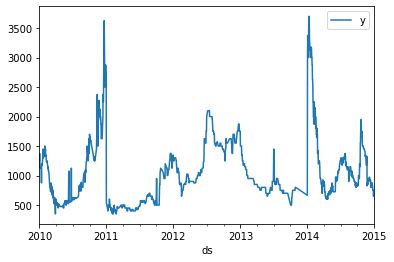

In [127]:
(data1.set_index('ds')).plot()
plt.show()

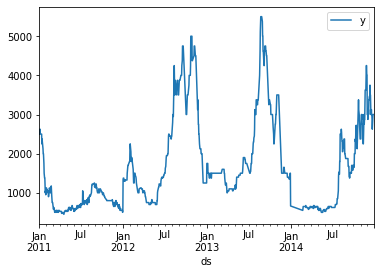

In [128]:
(data2.set_index('ds')).plot()
plt.show()

In [100]:
temp_data1 = data1.set_index('ds')
temp_data2 = data2.set_index('ds')

In [129]:
model1 = Prophet()
model1.fit(data1)
model2 = Prophet()
model2.fit(data2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [135]:
# Python
future = model1.make_future_dataframe(periods=366)
future.tail()

,ds
2188,2015-12-29
2189,2015-12-30
2190,2015-12-31
2191,2016-01-01
2192,2016-01-02


In [136]:
forecast = model1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2188,2015-12-29,1336.354879,720.959828,2040.430602
2189,2015-12-30,1340.593518,660.750885,2009.243446
2190,2015-12-31,1360.909501,667.636954,2030.406111
2191,2016-01-01,1372.284763,715.931955,2042.265294
2192,2016-01-02,1366.396026,739.533200,1998.578927


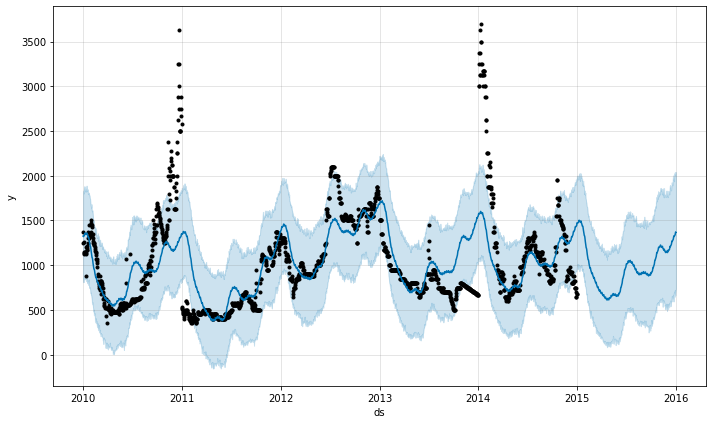

In [137]:

# Python
fig1 = model1.plot(forecast)
